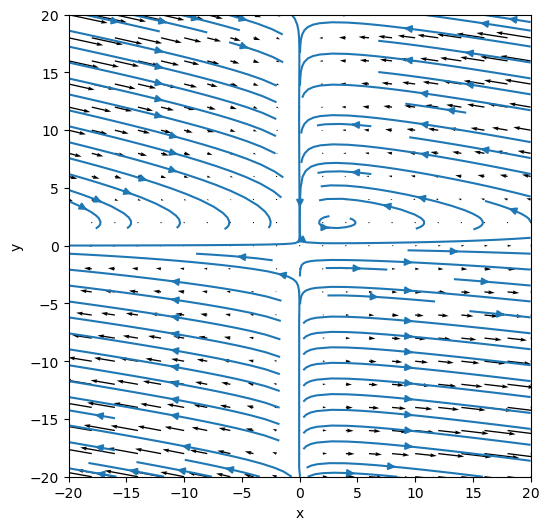

In [45]:
# code courtesy of Adam Dempsey
# modified for PHY1055 by Oisín Creaner
import matplotlib.pyplot as plt
import numpy as np

a = 4
b = 2
c = 1/3
d = 1


def main():
    plt.close('all')
    coords = np.linspace(-20, 20, 21)
    x, y = np.meshgrid(coords, coords)
    dx = a*x - b*x*y
    dy = c*x*y - d*y
    plt.figure(figsize=(6,6))
    plt.gca().set_aspect('equal', adjustable='box')  # Make plot box square
    plt.xlabel('x')
    plt.ylabel('y')
    plt.quiver(x, y, dx, dy)  # plot field as quiver
    plt.streamplot(x, y, dx, dy)  # plot streamlines of field.
    plt.show()


# if this is the module called directly, then execute the main function, otherwise only define it
if __name__ == '__main__':
    main()

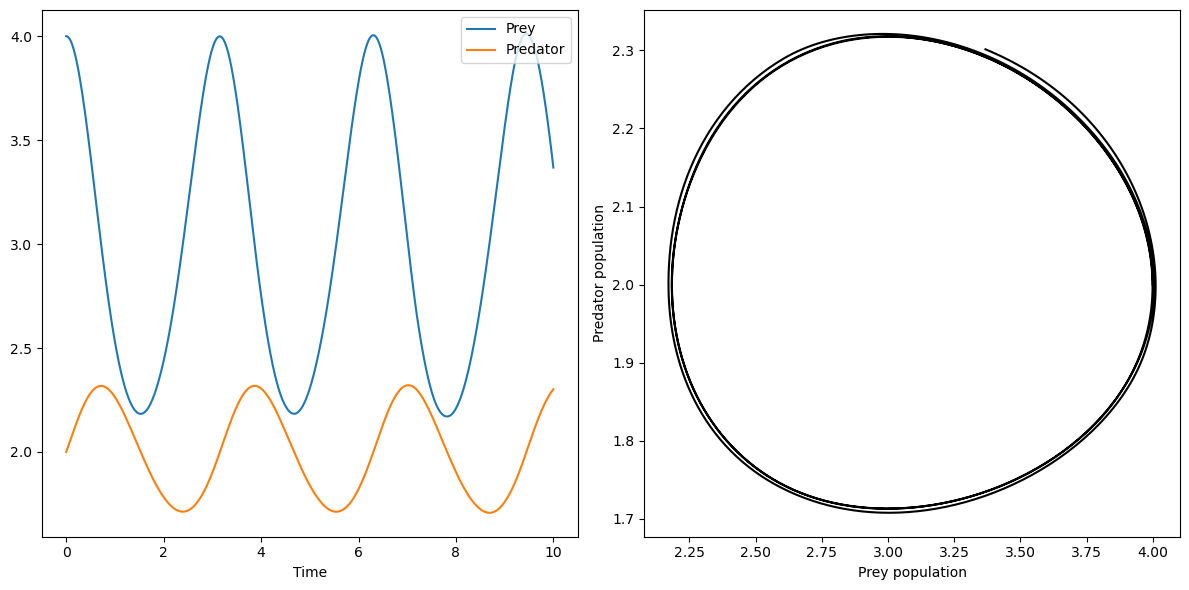

In [46]:
# code courtesy of Adam Dempsey
# modified for PHY1055 by Oisín Creaner

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate


def lotka(t, y, a, b, c, d):
    x, v = y  # x is prey, v is predator
    dxdt = a*x - b*x*v
    dvdt = c*x*v - d*v
    dydt = np.array([dxdt, dvdt])
    return dydt

# define a lambda function in a proper program that takes these arguments
lfun = lambda t, y, : lotka(t, y, a, b, c, d)

# Define the initial parameters
x0 = 4  # initial position
v0 = 2  # initial velocity
y0 = (x0, v0)  # initial state
t0 = 0  # initial time

a = 4
b = 2
c = 1/3
d = 1

# Define the final time and the number of time steps
tf = 10  # final time
n = 1001  # Number of points at which output will be evaluated
# Note: this does not mean the integrator will take only n steps
# Scipy will take more steps if required to control the error in the solution

# Create an array of the time steps
t = np.linspace(t0, tf, n)  # Points at which output will be evaluated

# Calls the method integrate.solve_ivp()
result = integrate.solve_ivp(fun=lfun,  # The function defining the derivative
                             t_span=(t0, tf),  # Initial and final times
                             y0=y0,  # Initial state
                             method="RK45",  # Integration method
                             t_eval=t)  # Time points for result to be defined at

# Read the solution and time from the result array returned by Scipy
x, v = result.y
t = result.t



# Plotting the results
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot prey and predator populations as a function of time
ax[0].plot(t, x, label=r"Prey")
ax[0].plot(t, v, label=r"Predator")
ax[0].set_xlabel(r"Time")
ax[0].legend(loc='upper right')

# Create a phase space plot (Predator vs Prey)
ax[1].plot(x, v, 'k')
#ax[1].axis('equal')
ax[1].set_xlabel(r"Prey population")
ax[1].set_ylabel(r"Predator population")

# Show the plot
plt.tight_layout()
plt.show()

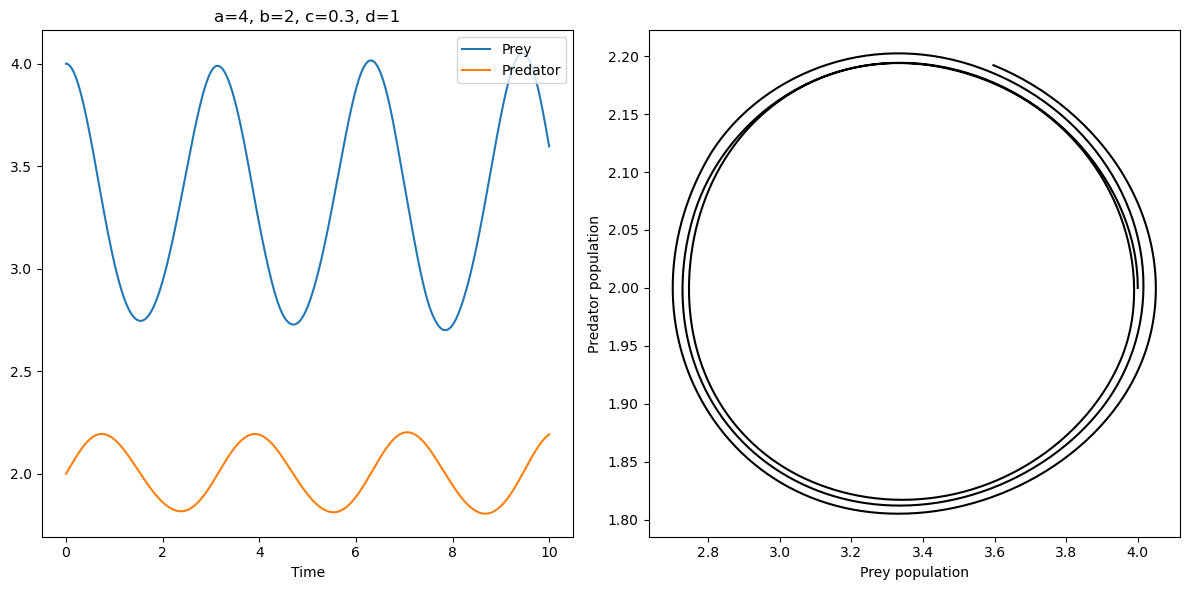

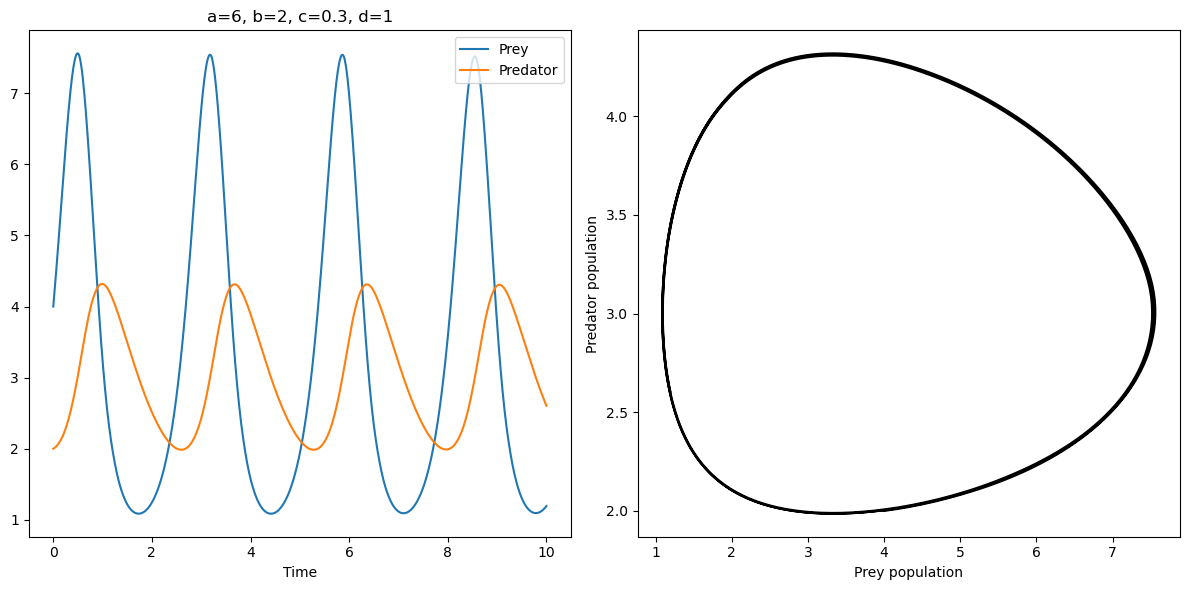

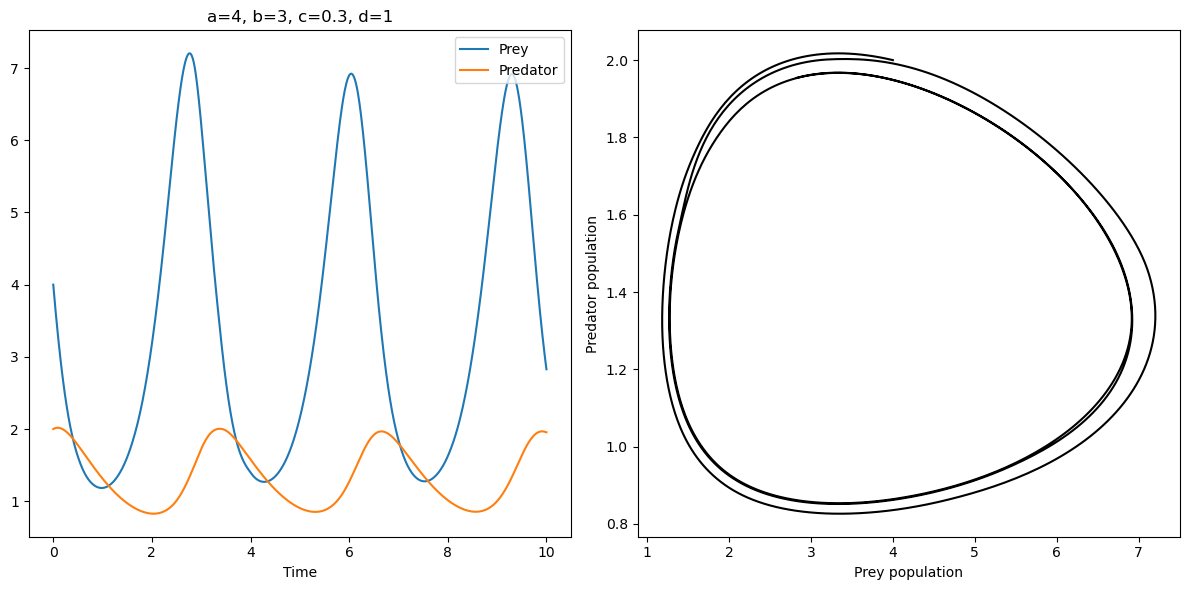

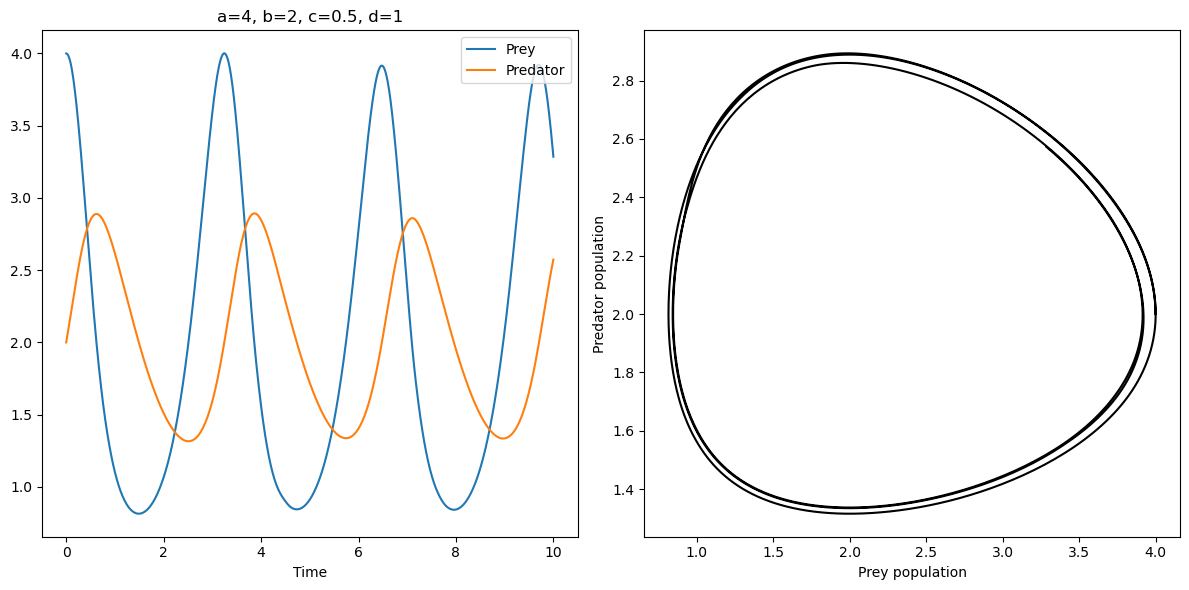

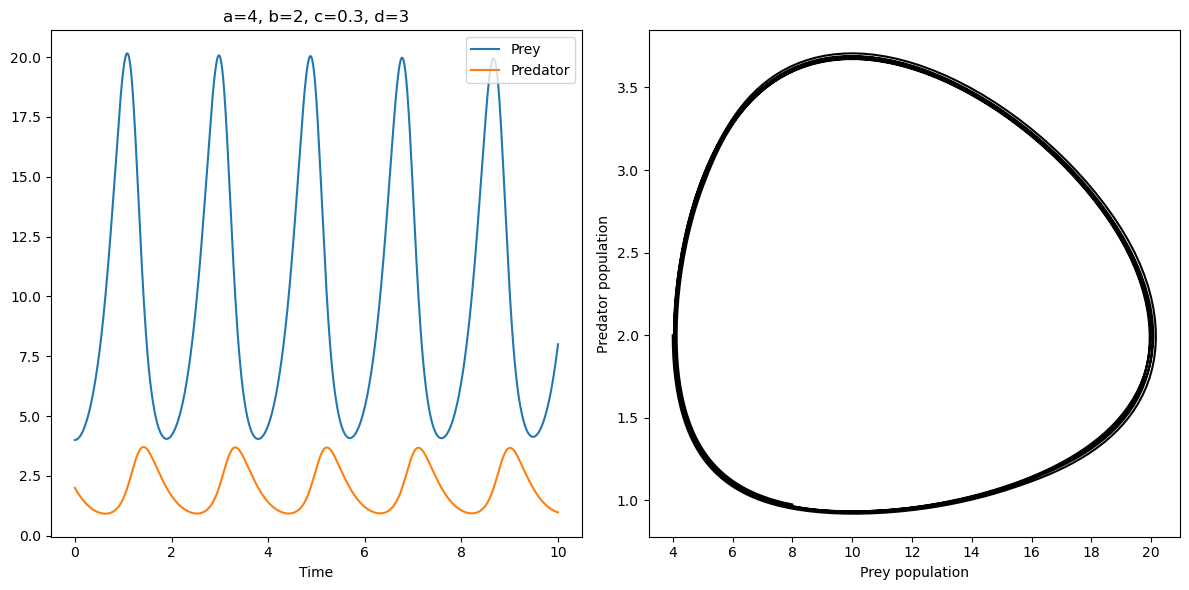

In [50]:
# Code courtesy of Adam Dempsey
# Modified for PHY1055 by Oisín Creaner
# Further modified to investigate varying parameters

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Define the Lotka-Volterra equations
def lotka(t, y, a, b, c, d):
    x, v = y  # x is prey, v is predator
    dxdt = a * x - b * x * v  # Prey equation
    dvdt = c * x * v - d * v  # Predator equation
    dydt = np.array([dxdt, dvdt])
    return dydt

# Function to solve and plot for different parameter values
def plot_lotka_volterra(a, b, c, d, x0=4, v0=2, tf=10, n=1001):
    # Define a lambda function for the ODE solver
    lfun = lambda t, y: lotka(t, y, a, b, c, d)
    
    # Initial state (prey and predator populations)
    y0 = (x0, v0)
    
    # Time range
    t0 = 0  # Initial time
    #tf = 20
    t = np.linspace(t0, tf, n)  # Points at which output will be evaluated
    
    # Solve the ODE system
    result = integrate.solve_ivp(fun=lfun,  # Function for derivative
                                 t_span=(t0, tf),  # Time span
                                 y0=y0,  # Initial state
                                 method="RK45",  # Integration method
                                 t_eval=t)  # Points for output
    
    # Extract the solutions
    x, v = result.y  # x = prey, v = predator
    t = result.t  # Time points
    
    # Plotting the results
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
    
    # Plot prey and predator populations as a function of time
    ax[0].plot(t, x, label=r"Prey")
    ax[0].plot(t, v, label=r"Predator")
    ax[0].set_xlabel(r"Time")
    ax[0].set_title(f"a={a}, b={b}, c={c}, d={d}")
    ax[0].legend(loc='upper right')
    
    # Create a phase space plot (Predator vs Prey)
    ax[1].plot(x, v, 'k')
    ax[1].set_xlabel(r"Prey population")
    ax[1].set_ylabel(r"Predator population")
    
    plt.tight_layout()
    plt.show()

# Investigate how changing the parameters affects the solutions
# Define ranges of parameters to investigate
'''
parameter_sets = [
    {"a": 2, "b": 1, "c": 0.5, "d": 0.5},
    {"a": 4, "b": 2, "c": 1/3, "d": 1},  # Original parameters
    {"a": 3, "b": 1.5, "c": 0.4, "d": 0.8},
    {"a": 1, "b": 0.5, "c": 0.1, "d": 0.2},
]
'''
parameter_sets = [
    {"a": 4, "b": 2, "c": 0.3, "d": 1},
    {"a": 6, "b": 2, "c": 0.3, "d": 1},  # Original parameters
    {"a": 4, "b": 3, "c": 0.3, "d": 1},
    {"a": 4, "b": 2, "c": 0.5, "d": 1},
    {"a": 4, "b": 2, "c": 0.3, "d": 3},
]
# Loop through the parameter sets and plot the results
for params in parameter_sets:
    a = params["a"]
    b = params["b"]
    c = params["c"]
    d = params["d"]
    
    # Generate x(t), y(t), and phase space plot for each parameter set
    plot_lotka_volterra(a, b, c, d)
